In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from copy import deepcopy
directory = "./result"
file_name = 'PhO-red.npz'
random_seed = 2024
file_path = os.path.join(directory, file_name)

PhO-red_npz = np.load(file_path, allow_pickle=True)

print("Arrays in the NPZ file:", PhO_rdkit_maccs_npz.files)
PhO-red_data = PhO-red_npz['data']
PhO-red_columns = PhO-red_npz['columns']
physorg_react_data_df = pd.DataFrame(PhO-red_data, columns=PhO-red_columns)

physorg_react_data_df.dropna(inplace=True) 

test_index = [87, 381, 316, 120, 479, 448, 197, 507, 198, 379, 508, 313, 265, 449, 453, 89, 292, 88, 121, 266, 454, 455, 447, 456, 271, 
              269, 294, 293, 297, 248, 249, 464, 312, 499, 289, 509, 511, 267, 166, 386, 290, 392, 498, 91, 488, 7, 278, 54, 285, 94, 303, 
              358, 444, 5, 286, 98, 458, 2, 291, 268, 470, 262, 308, 272, 53, 354, 512, 360, 495, 468, 391, 310, 307, 457, 306, 258, 352, 
              305, 357, 131, 362, 42, 311, 460, 304, 510, 298, 263, 350, 368, 100, 115, 61, 500, 56, 90, 442, 277, 487, 309, 0, 1, 356]

External_index = [462,119 ,396, 273, 375, 503, 318, 504, 472, 463, 465, 341, 342, 340, 477, 327, 348, 476,423 ,377, 332, 333, 182, 181,
                  349, 183, 112, 328, 323, 324, 113, 329, 330, 331, 144, 145,149, 150, 153, 151, 152, 154, 147, 485, 148, 482, 370, 373,
                  372, 146, 371]
all_indices = set(range(len(physorg_react_data_df)))
train_val_indices = sorted(list(all_indices - set(test_index) - set(External_index)))  
X = physorg_react_data_df.drop(columns=['YRed/Ox', 'compound_name'])
y = physorg_react_data_df['YRed/Ox']
X_train_val = X.iloc[train_val_indices]
y_train_val = y.iloc[train_val_indices]

scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)

Arrays in the NPZ file: ['data', 'columns']


# Fine screening of hyperparameters and mapping of learning curves

In [2]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV, KFold

model = BayesianRidge()

param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

Grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=kfold, verbose=2, n_jobs=-1)

Grid_search.fit(X_train_val_scaled, y_train_val)

print("Best parameters:", Grid_search.best_params_)
best_model = Grid_search.best_estimator_


Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06

[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[C

[CV] END alpha_1=1e-05, alpha_2=1e-06, lambda_1=0.0001, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, lambda_1=0.0001, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s


Best parameters: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-06}


In [3]:
rates = [int(i) for i in np.linspace(0.1, 0.9, 20) * X_train_val_scaled.shape[0]]
print(rates)

r2_list = []
r2_std_list = []
r2_train_list = []
r2_train_std_list = []
random_seed = 2024
np.random.seed(random_seed)
model = BayesianRidge( alpha_1=1e-06, alpha_2=0.0001,lambda_1 =0.0001, lambda_2 =1e-06)
kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train_val_scaled, y_train_val, test_size=0.2, random_state=random_seed)
for rate in rates:
    r2s = []
    r2ts = []
    models = []
    y_pred = []
    maes = []
    rmses = []
    for train_index, val_index in kf.split(y_train):
        try:
            X_train_, X_test_, y_train_, y_test_ = train_test_split(
                X_train, y_train, train_size=rate)
        except:
            X_train_, y_train_ = X_train, y_train

        model.fit(X_train_, y_train_)
        models.append(deepcopy(model))
        y_pred.append(model.predict(X_test))
        valid_p, valid_y = model.predict(X_test), y_test
        r2 = r2_score(valid_y, valid_p)
        r2t = r2_score(model.predict(X_train_), y_train_)
        mae = mean_absolute_error(valid_y, valid_p)
        rmse = np.sqrt(mean_squared_error(valid_y, valid_p))
        r2s.append(r2)
        r2ts.append(r2t)
        maes.append(mae)
        rmses.append(rmse)
    
    valid_p, valid_y = np.array(y_pred).mean(axis=0), y_test
    r2 = np.array(r2s).mean(axis=0)
    r2_std = pd.DataFrame(r2s).std()[0]
    # print(r2_std)
    r2t = np.array(r2ts).mean(axis=0)
    r2t_std = pd.DataFrame(r2ts).std()[0]
    r2_list.append(r2)
    r2_train_list.append(r2t)
    r2_std_list.append(r2_std)
    r2_train_std_list.append(r2t_std)
    print(' $R^2$: {:.3}\n r2t: {:.3}\n r2std: {:.3}\n r2tstd: {:.3}'.format(
        r2, r2t, r2_std, r2t_std))
    
learning_curve = pd.DataFrame(columns=('r2', 'r2t', 'r2_std', 'r2t_std', 'num'))
learning_curve['r2'] = r2_list
learning_curve['r2t'] = r2_train_list
learning_curve['r2_std'] = r2_std_list
learning_curve['r2t_std'] = r2_train_std_list
learning_curve['num'] = rates
# learning_curve.to_csv('learn_curve.csv')
learning_curve

[36, 51, 67, 82, 97, 113, 128, 144, 159, 174, 190, 205, 220, 236, 251, 267, 282, 297, 313, 328]
 $R^2$: 0.688
 r2t: 0.995
 r2std: 0.151
 r2tstd: 0.00996
 $R^2$: 0.732
 r2t: 0.992
 r2std: 0.156
 r2tstd: 0.00641
 $R^2$: 0.741
 r2t: 0.993
 r2std: 0.0843
 r2tstd: 0.00368
 $R^2$: 0.776
 r2t: 0.99
 r2std: 0.0846
 r2tstd: 0.00418
 $R^2$: 0.743
 r2t: 0.986
 r2std: 0.194
 r2tstd: 0.00549
 $R^2$: 0.849
 r2t: 0.991
 r2std: 0.11
 r2tstd: 0.00289
 $R^2$: 0.893
 r2t: 0.989
 r2std: 0.0819
 r2tstd: 0.00381
 $R^2$: 0.9
 r2t: 0.99
 r2std: 0.0396
 r2tstd: 0.00276
 $R^2$: 0.904
 r2t: 0.988
 r2std: 0.0554
 r2tstd: 0.00317
 $R^2$: 0.914
 r2t: 0.987
 r2std: 0.0637
 r2tstd: 0.00316
 $R^2$: 0.874
 r2t: 0.987
 r2std: 0.0992
 r2tstd: 0.00232
 $R^2$: 0.944
 r2t: 0.988
 r2std: 0.0236
 r2tstd: 0.00175
 $R^2$: 0.93
 r2t: 0.987
 r2std: 0.0349
 r2tstd: 0.00139
 $R^2$: 0.953
 r2t: 0.986
 r2std: 0.0168
 r2tstd: 0.000834
 $R^2$: 0.927
 r2t: 0.986
 r2std: 0.0535
 r2tstd: 0.00135
 $R^2$: 0.938
 r2t: 0.986
 r2std: 0.0277
 r

,r2,r2t,r2_std,r2t_std,num
0,0.688036,0.994621,0.150739,0.009955,36
1,0.731881,0.992167,0.155801,0.006414,51
2,0.741405,0.992614,0.084288,0.003685,67
3,0.776357,0.990477,0.084613,0.004179,82
4,0.742738,0.985667,0.193862,0.005491,97
5,0.849476,0.990912,0.109886,0.002889,113
6,0.893331,0.988506,0.081932,0.003814,128
7,0.900110,0.989611,0.039605,0.002764,144
8,0.903998,0.987769,0.055394,0.003169,159
9,0.913865,0.986505,0.063740,0.003159,174


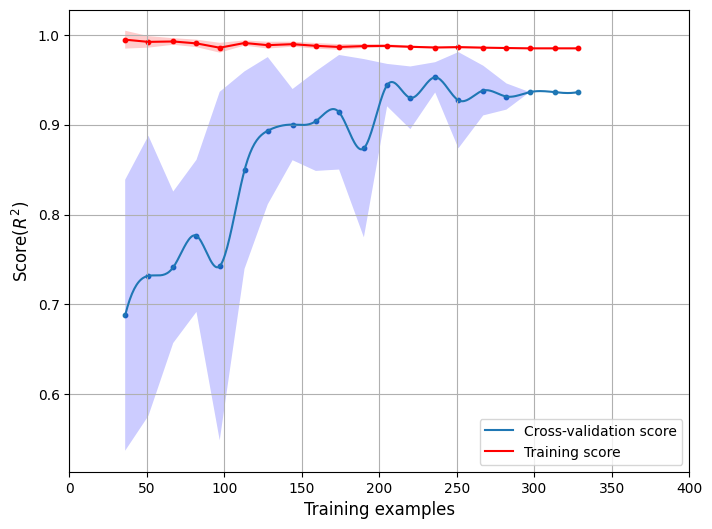

In [4]:
labels = rates 

min_label = min(labels)
max_label = max(labels)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
r2 = learning_curve['r2']
r2t = learning_curve['r2t']
r2std = learning_curve['r2_std']
r2tstd = learning_curve['r2t_std']
labels = rates


xnew = np.linspace(min_label, max_label, 400)
func_1 = interp1d(labels, r2, kind='cubic')
r2_new = func_1(xnew)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(xnew,r2_new, '-', label = 'Cross-validation score')  
# ax.plot(labels, r2, '-', label = 'Cross-validation score')
ax.scatter(labels, r2, s=10)
ax.fill_between(labels, r2-r2std, r2+r2std, alpha=0.2, facecolor='b')


ax.plot(labels, r2t, '-r', label = 'Training score')
ax.scatter(labels, r2t, s=10, c='r')
ax.fill_between(labels, r2t-r2tstd, r2t+r2tstd, alpha=0.2, facecolor='r')
plt.xlim((0, 400))
plt.legend(loc='lower right')

ax.set_xlabel("Training examples", fontsize=12)
ax.set_ylabel("Score($R^2$)", fontsize=12)
ax.grid()
plt.savefig("./result/learning curve-PhO.tif", dpi=600)
plt.savefig('./result/learning curve-PhO.png', dpi=600)

# Feature Engineering - Feature Screening

In [4]:
'''
The dataset is divided into training/validation and out-of-sample (OOS) test sets based on predefined indices. 
The division process ensures that the test data is completely held out during the training and validation phases 
to properly evaluate the model's performance on unseen data.

- `test_index`: This is the primary set of indices used to define the initial part of the OOS test set.
- `test_index_db2`: Additional test indices derived by adding half the length of the dataset (`length_db`) to each index in `test_index`.
  This approach accounts for the potential scenario where test data points are distributed across the dataset.

The following steps are executed in the code:
1. `length_db` is calculated as half the total number of data points, used to adjust the indices for the second half of the dataset.
2. `test_index_db2` is generated to cover any test data points that might appear in the latter half of the dataset.
3. `full_test_index` combines `test_index` and `test_index_db2` to form the complete set of indices for the OOS test set.
4. The data points at these indices are then extracted as the OOS test set (`oos_x`, `oos_y`), ensuring they are not used in model training or validation.
5. The remaining data points are used to create the training/validation set (`X_scaled`, `y_train_val`), which is also standardized to aid in model training.
'''

directory = "./result"
file_name = 'PhO-red.npz'

file_path = os.path.join(directory, file_name)

PhO_rdkit_maccs_npz = np.load(file_path, allow_pickle=True)

print("Arrays in the NPZ file:", PhO_rdkit_maccs_npz.files)
PhO-red_data = PhO-red_npz['data']
PhO-red_columns = PhO-red_npz['columns']
physorg_react_data_df = pd.DataFrame(PhO-red_data, columns=PhO-red_columns)

physorg_react_data_df.dropna(inplace=True)

# 准备数据
test_index = [87, 381, 316, 120, 479, 448, 197, 507, 198, 379, 508, 313, 265, 449, 453, 89, 292, 88, 121, 266, 454, 455, 447, 456, 271, 
              269, 294, 293, 297, 248, 249, 464, 312, 499, 289, 509, 511, 267, 166, 386, 290, 392, 498, 91, 488, 7, 278, 54, 285, 94, 303, 
              358, 444, 5, 286, 98, 458, 2, 291, 268, 470, 262, 308, 272, 53, 354, 512, 360, 495, 468, 391, 310, 307, 457, 306, 258, 352, 
              305, 357, 131, 362, 42, 311, 460, 304, 510, 298, 263, 350, 368, 100, 115, 61, 500, 56, 90, 442, 277, 487, 309, 0, 1, 356]

External_index = [462,119 ,396, 273, 375, 503, 318, 504, 472, 463, 465, 341, 342, 340, 477, 327, 348, 476,423 ,377, 332, 333, 182, 181,
                  349, 183, 112, 328, 323, 324, 113, 329, 330, 331, 144, 145,149, 150, 153, 151, 152, 154, 147, 485, 148, 482, 370, 373,
                  372, 146, 371]

all_indices = set(range(len(physorg_react_data_df)))
train_val_indices = sorted(list(all_indices - set(test_index) - set(External_index)))  
X = physorg_react_data_df.drop(columns=['YRed/Ox', 'compound_name'])
y = physorg_react_data_df['YRed/Ox']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[train_val_indices])
y_train_val = y.iloc[train_val_indices]
test_x = scaler.transform(X.iloc[test_index])
test_y = y.iloc[test_index]

Arrays in the NPZ file: ['data', 'columns']


In [18]:
random_seed = 2024
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
# The max_depth and n_estimators are identified by hyperparameters optimization procedure, which is demonstrated in Notebook 3.
model = BayesianRidge( alpha_1=1e-06, alpha_2=0.0001,lambda_1 =0.0001, lambda_2 =1e-06)
cv = KFold(n_splits=10, shuffle=True, random_state=random_seed)
selector = RFECV(model, step=1, min_features_to_select=1,cv=cv, n_jobs=-1)
selector = selector.fit(X_scaled, y_train_val)
sel_index = np.where(selector.support_==True)[0]
print('----Reserved Descriptors----')
print('Size: %d'%len(sel_index))
print('Index of selected descriptors', sel_index + 1)

----Reserved Descriptors----
Size: 66
Index of selected descriptors [  1   2   3   4   6   8   9  11  13  14  17  22  25  26  31  33  34  35
  36  37  39  40  41  42  43  45  46  47  48  49  51  52  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  71  72  76  78  79  80  81  82
  83  85  87  88  89  90  91  92  93  96  97 101]


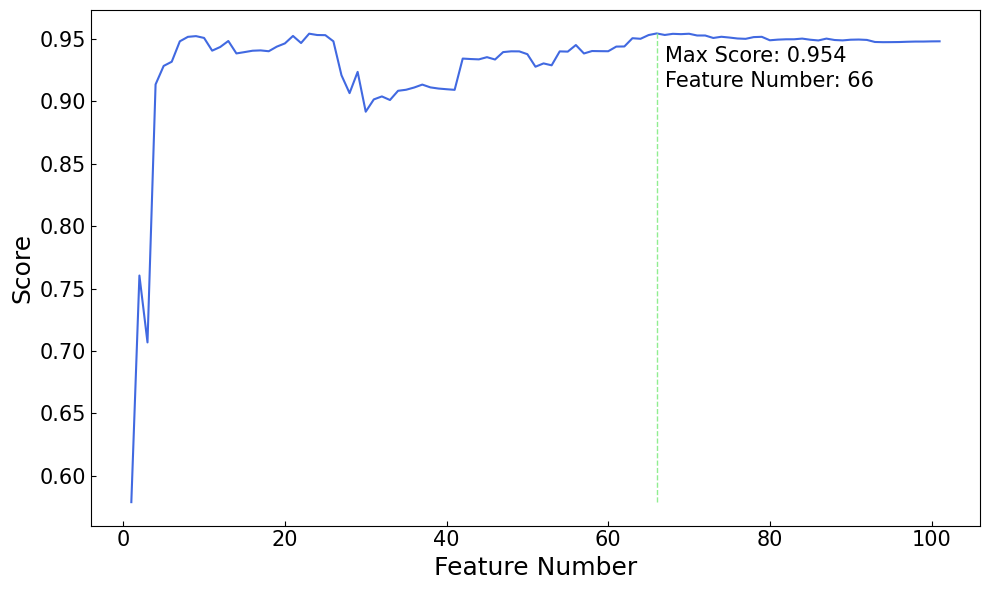

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))  


y_r2 = selector.cv_results_['mean_test_score']
x_1_index = [item + 1 for item in range(len(y_r2))]

max_index = np.argmax(y_r2) + 1
max_score = np.max(y_r2)

plt.plot(x_1_index, y_r2, c='royalblue')

plt.plot([max_index, max_index], [np.min(y_r2), max_score], c='lightgreen', linewidth=1, linestyle='--')#绘制一条垂直线，从y_r2的最高点到最低点

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.text(max_index + 1, max_score - 0.010, f'Max Score: {max_score:.3f}', fontsize=15, verticalalignment='top')
plt.text(max_index + 1, max_score - 0.030, f'Feature Number: {max_index}', fontsize=15, verticalalignment='top')

plt.xlabel('Feature Number', fontsize=18)
plt.ylabel('Score', fontsize=18)

plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)

plt.tight_layout()
plt.savefig('./RFECV-PhO.png', dpi=600)
plt.savefig('./RFECV-PhO.tif', dpi=600)
plt.show()

# Model Training

 Training Set

In [7]:
from scipy.stats import pearsonr
val_Y = []
val_P = []
kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)
for train_idx,val_idx in kfold.split(X_scaled):
    train_x,val_x = X_scaled[:,sel_index][train_idx],X_scaled[:,sel_index][val_idx]
    train_y,val_y = y_train_val.iloc[train_idx],y_train_val.iloc[val_idx]
    val_P_ = []
    for try_ in range(10): 
        model.fit(train_x,train_y)
        val_p = model.predict(val_x)
        val_P_.append(val_p)
    val_P_ = np.mean(val_P_,axis=0)
    val_P.append(val_P_)
    val_Y.append(val_y)
val_P = np.concatenate(val_P)
val_Y = np.concatenate(val_Y)
mae = mean_absolute_error(val_Y,val_P)
r2 = r2_score(val_Y,val_P)
pearson_r,_ = pearsonr(val_Y,val_P)

print("MAE: %.4f, R2: %.4f, Pearson R: %.4f"%(mae,r2,pearson_r))

MAE: 0.0471, R2: 0.9680, Pearson R: 0.9841


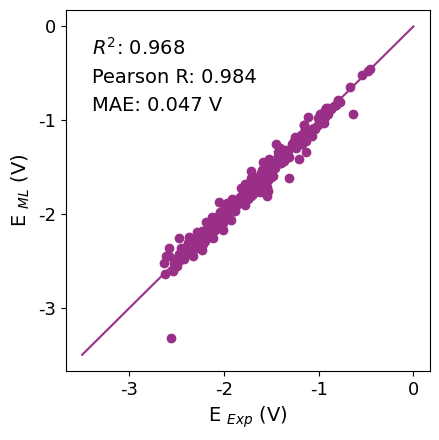

In [8]:
plt.figure(figsize=(4.5,4.5))

plt.scatter(val_Y,val_P,c='#992f87')

plt.text(-3.4,-0.3,'$R^2$: %.3f'%r2_score(val_Y,val_P),fontsize=14)
plt.text(-3.4,-0.6,'Pearson R: %.3f'%pearsonr(val_Y,val_P)[0],fontsize=14)
plt.text(-3.4,-0.9,'MAE: %.3f V'%mean_absolute_error(val_Y,val_P),fontsize=14)

plt.plot([-3.5,0],[-3.5,0],c='#992f87')
plt.xlabel('E $_{Exp}$ (V)',fontsize=14)
plt.ylabel('E $_{ML}$ (V)',fontsize=14)
plt.xticks([-3, -2, -1, 0],list(map(str,[-3, -2, -1, 0])),fontsize=13)
plt.yticks([-3, -2, -1,0],list(map(str,[-3, -2, -1, 0])),fontsize=13)

plt.tick_params(bottom='on',left='on')
plt.tight_layout()
plt.savefig('./result/CV-E-BRPhO.tif', dpi=600) 
plt.savefig('./result/CV-E-BRPhO.png', dpi=600)

Test Set

In [9]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr

test_P = []
feature_importance = []

for _ in range(10):
    model.fit(X_scaled[:, sel_index], y_train_val)
    
    feature_importance.append(np.abs(model.coef_))
    
    test_p = model.predict(test_x[:, sel_index])
    test_P.append(test_p)

test_p = np.mean(test_P, axis=0)
feature_importance = np.mean(feature_importance, axis=0)

sel_feature_names = np.array(PhO_rdkit_maccs_columns)[sel_index + 1]

sorted_feature_index = np.argsort(feature_importance)
importance_desc_names = sel_feature_names[sorted_feature_index]
importance_of_sel_desc = feature_importance[sorted_feature_index]

r2 = r2_score(test_y, test_p)
pearson_r, _ = pearsonr(test_y, test_p)
mae = mean_absolute_error(test_y, test_p)

print("MAE: %.4f, R2: %.4f, Pearson R: %.4f" % (mae, r2, pearson_r))

MAE: 0.0725, R2: 0.9739, Pearson R: 0.9872


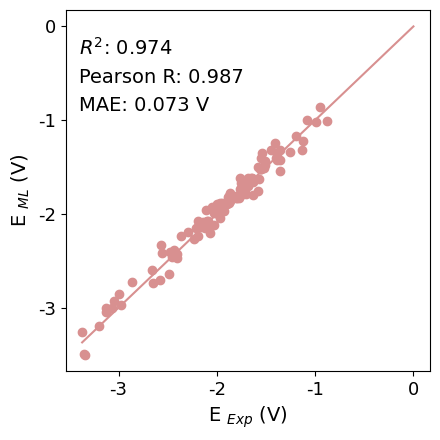

In [10]:
plt.figure(figsize=(4.5,4.5))

plt.scatter(test_y,test_p,c='#D89090')
plt.text(-3.4,-0.3,'$R^2$: %.3f'%r2_score(test_y,test_p),fontsize=14)
plt.text(-3.4,-0.6,'Pearson R: %.3f'%pearsonr(test_y,test_p)[0],fontsize=14)
plt.text(-3.4,-0.9,'MAE: %.3f V'%mean_absolute_error(test_y,test_p),fontsize=14)
plt.plot([test_y.min(), 0],[test_y.min(), 0],c='#D89090')
plt.xlabel('E $_{Exp}$ (V)',fontsize=14)
plt.ylabel('E $_{ML}$ (V)',fontsize=14)
plt.xticks([-3, -2, -1, 0],list(map(str,[-3, -2, -1, 0])),fontsize=13)
plt.yticks([-3, -2, -1, 0],list(map(str,[-3, -2, -1, 0])),fontsize=13)
plt.tick_params(bottom='on',left='on')
plt.tight_layout()
plt.savefig('./result/CV-E-BRPhO-oos.tif', dpi=600)  
plt.savefig('./result/CV-E-BRPhO-oos.png', dpi=600)

# Comparison of real and projected data

In [68]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
def fixed_selector_transform(X):
    return X[:, sel_index]

fixed_selector = FunctionTransformer(fixed_selector_transform)

pipeline = Pipeline([
    ('scaler', scaler),
    ('fixed_selector', fixed_selector),
    ('model', model)
])


X_full = np.vstack((X.iloc[train_val_indices], X.iloc[test_index]))  
y_full = np.concatenate((y_train_val, test_y))

pipeline.fit(X_full, y_full)

import shap
import joblib

X_scaled_full = pipeline.named_steps['scaler'].transform(X_full)
X_selected_full = pipeline.named_steps['fixed_selector'].transform(X_scaled_full)

explainer = shap.LinearExplainer(pipeline.named_steps['model'], X_selected_full)
shap_values = explainer.shap_values(X_selected_full)

joblib.dump(pipeline, 'Gred.joblib')


['Gred.joblib']

In [13]:
y_pred_full = pipeline.named_steps['model'].predict(X_selected_full)

selected_feature_names = importance_desc_names 

y_true_aligned = y_full

df = pd.DataFrame(X_scaled_full[:,sel_index], columns=selected_feature_names)

df['Predicted_Y'] = y_pred_full

df['True_Y'] = y_true_aligned

missing_true_y = df['True_Y'].isna().sum()
if missing_true_y > 0:
    print(f"发现{missing_true_y}个真实值的空白，尝试修复索引对齐...")

df = df.dropna(subset=['True_Y']).reset_index(drop=True)

print(df)

df.to_csv('selected_features_and_predicted_y_with_true_y.csv', index=False)

     Overall_Surface_Area_2  ODI_LUMO  Quadrupole_Moment_2  Quadrupole_Moment  \
0                 -0.650323  0.451838             0.614766          -0.683710   
1                 -1.253248  1.056319             0.749852          -1.159790   
2                 -1.141638  0.939752             0.700115          -1.052869   
3                  1.091372 -0.887447            -0.806837           1.087263   
4                  1.084750 -0.893398            -0.789052           1.079753   
..                      ...       ...                  ...                ...   
463               -0.637706  0.447525             0.743575          -0.763149   
464                1.107472 -0.884730            -0.851430           1.113910   
465               -0.324911  0.203784             0.406100          -0.390597   
466               -0.902431  0.641716             0.695321          -0.857609   
467                0.908228 -0.711972            -0.743370           0.933558   

     beta_HOMO_LUMO_Gap_2  

# Shap analysis and normalized presentation and data processing

Feature Importance (before and after normalization):
LEA_Var_2: Original SHAP Value = 0.8311, Normalized SHAP Value = 0.0004
Overall_Surface_Area_2: Original SHAP Value = 1.4151, Normalized SHAP Value = 0.0006
ODI_LUMO: Original SHAP Value = 4.4644, Normalized SHAP Value = 0.0020
Volume: Original SHAP Value = 4.5436, Normalized SHAP Value = 0.0020
Pos_Surface_Area_2: Original SHAP Value = 5.8731, Normalized SHAP Value = 0.0026
Quadrupole_Moment_2: Original SHAP Value = 5.9148, Normalized SHAP Value = 0.0026
Quadrupole_Moment: Original SHAP Value = 6.0298, Normalized SHAP Value = 0.0027
alpha_homo_number_2: Original SHAP Value = 7.1480, Normalized SHAP Value = 0.0032
alpha_lumo_number_2: Original SHAP Value = 7.1480, Normalized SHAP Value = 0.0032
Pi: Original SHAP Value = 7.3172, Normalized SHAP Value = 0.0033
ALIE_Ave_2: Original SHAP Value = 8.2464, Normalized SHAP Value = 0.0037
Len_Div_Diameter_2: Original SHAP Value = 8.6547, Normalized SHAP Value = 0.0039
Pi_2: Original SHAP Valu

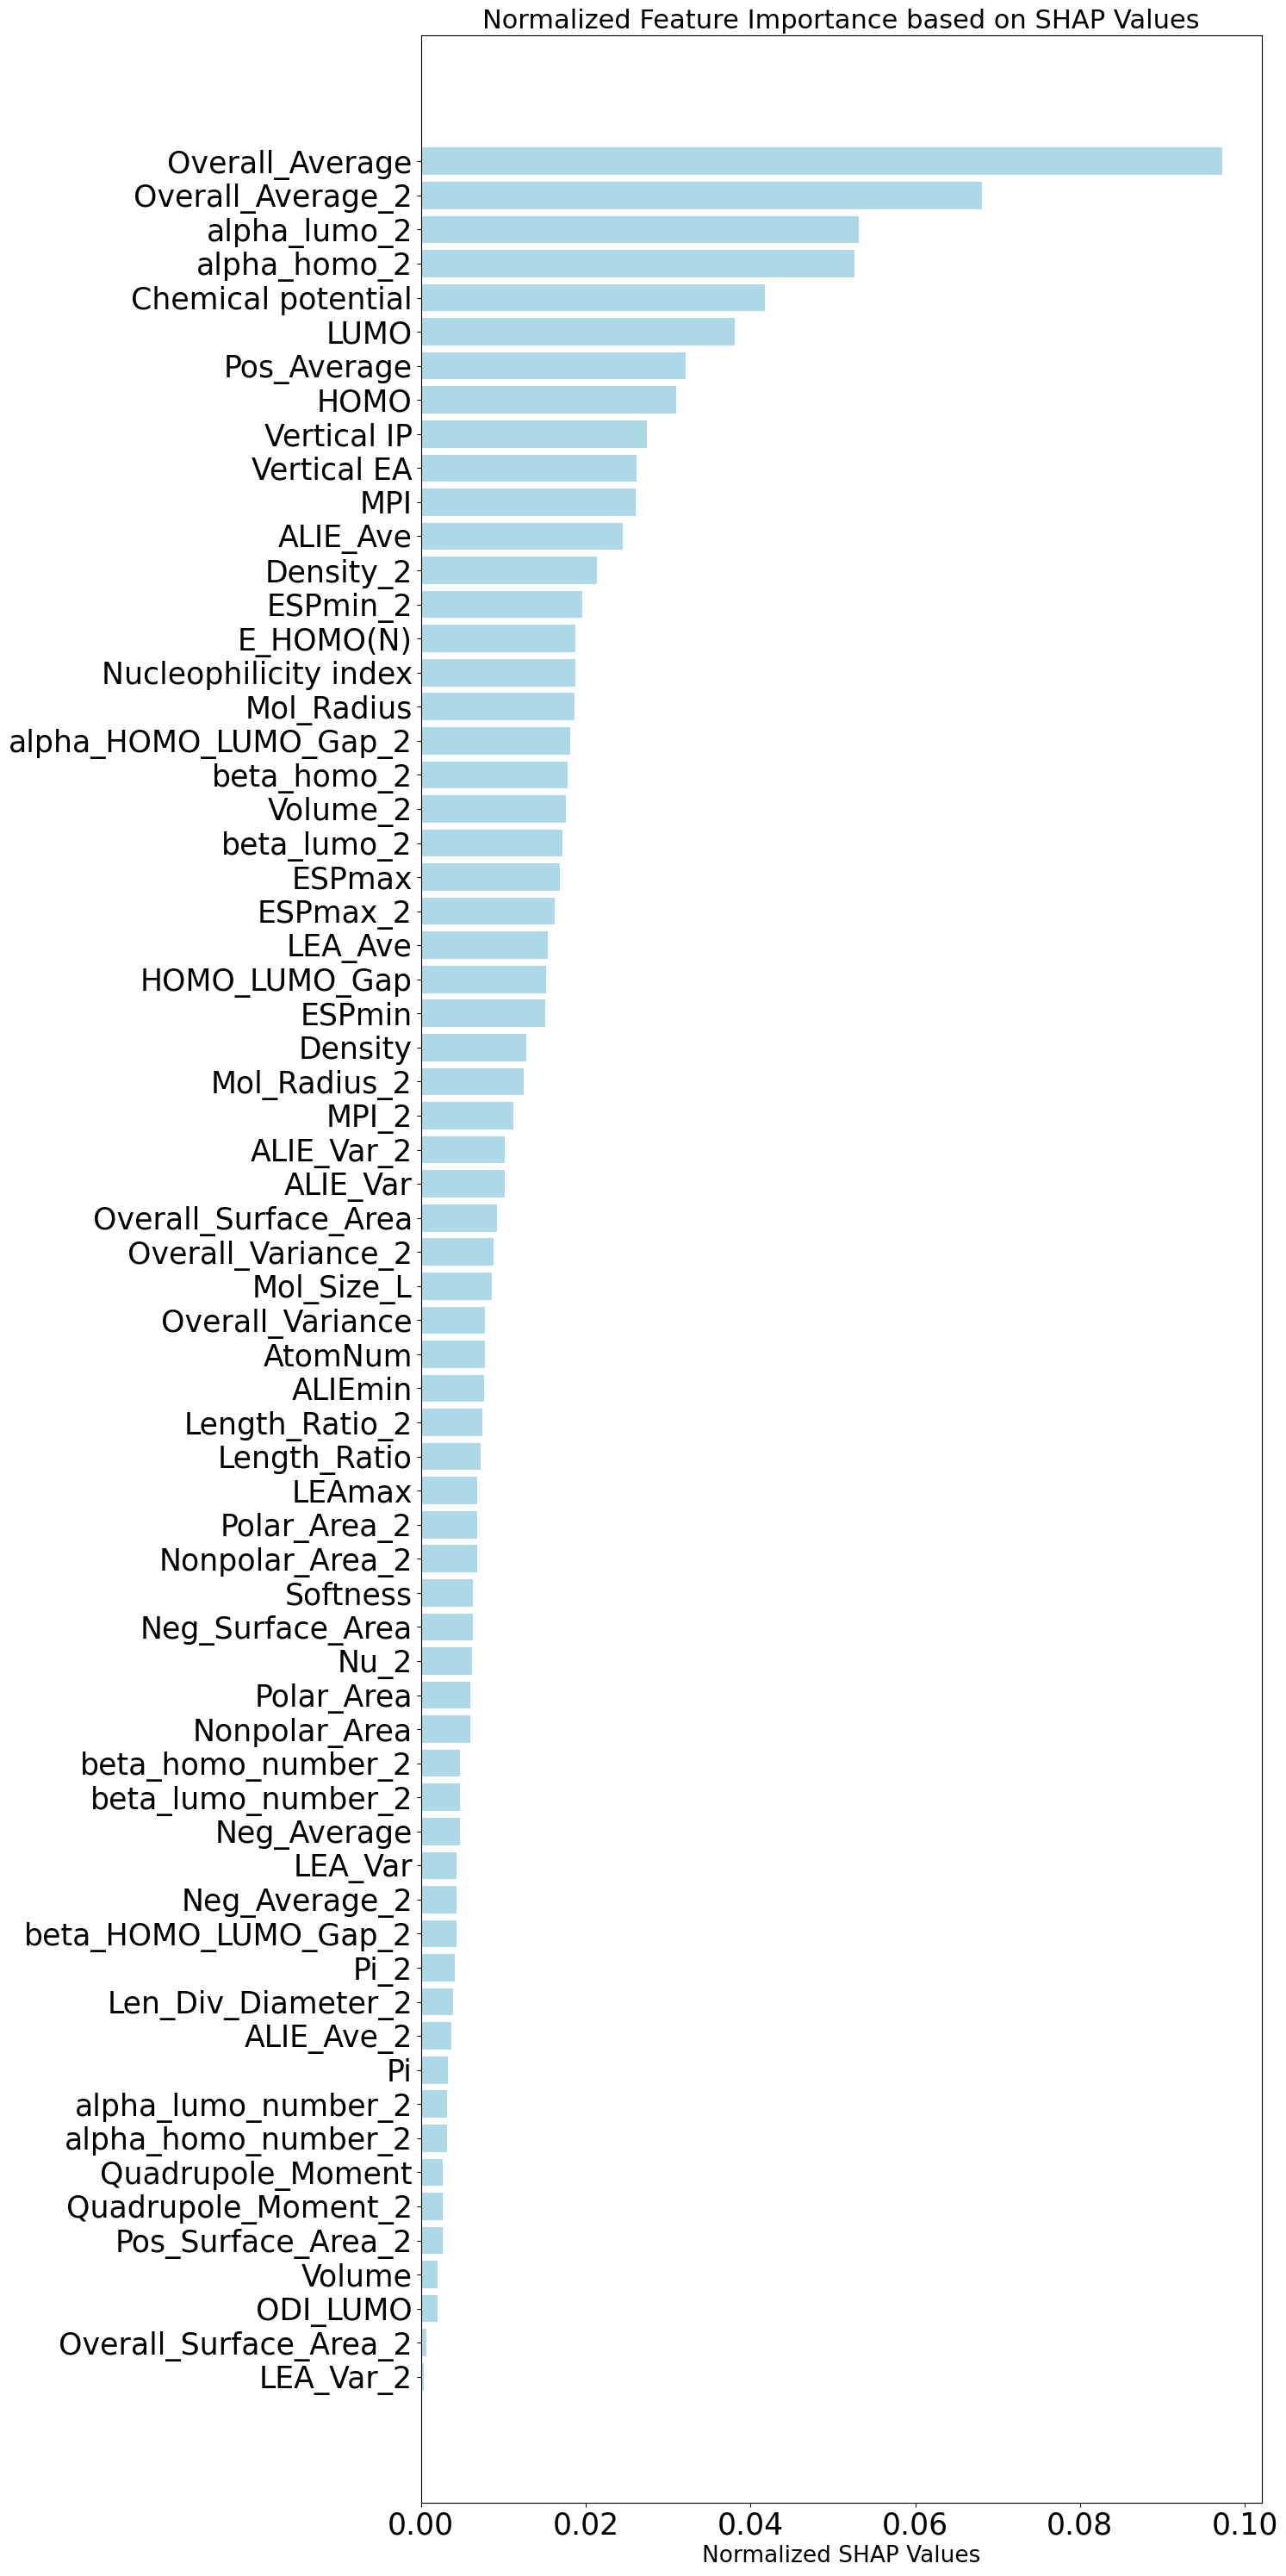

In [22]:
import numpy as np
import matplotlib.pyplot as plt

explainer = shap.LinearExplainer(pipeline.named_steps['model'], X_selected_full)
shap_values = explainer.shap_values(X_selected_full)
shap_abs_sum = np.sum(np.abs(shap_values), axis=0)

shap_values_normalized = shap_abs_sum / np.sum(shap_abs_sum)

sorted_indices = np.argsort(shap_values_normalized)

importance_desc_names = np.array(PhO_rdkit_maccs_columns)[sel_index + 1][sorted_indices]
importance_of_sel_desc = shap_values_normalized[sorted_indices]

print("Feature Importance (before and after normalization):")
for i in range(len(importance_desc_names)):
    print(f"{importance_desc_names[i]}: Original SHAP Value = {shap_abs_sum[sorted_indices[i]]:.4f}, Normalized SHAP Value = {importance_of_sel_desc[i]:.4f}")
    
fig = plt.figure(figsize=(15, 30))
plt.barh(importance_desc_names, importance_of_sel_desc, color='lightblue', align='center')
plt.xlabel('Normalized SHAP Values', fontsize=19)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Normalized Feature Importance based on SHAP Values', fontsize=22)
plt.tight_layout()

plt.savefig('./result/importance_desc_names_normalized.png', dpi=600)
plt.show()

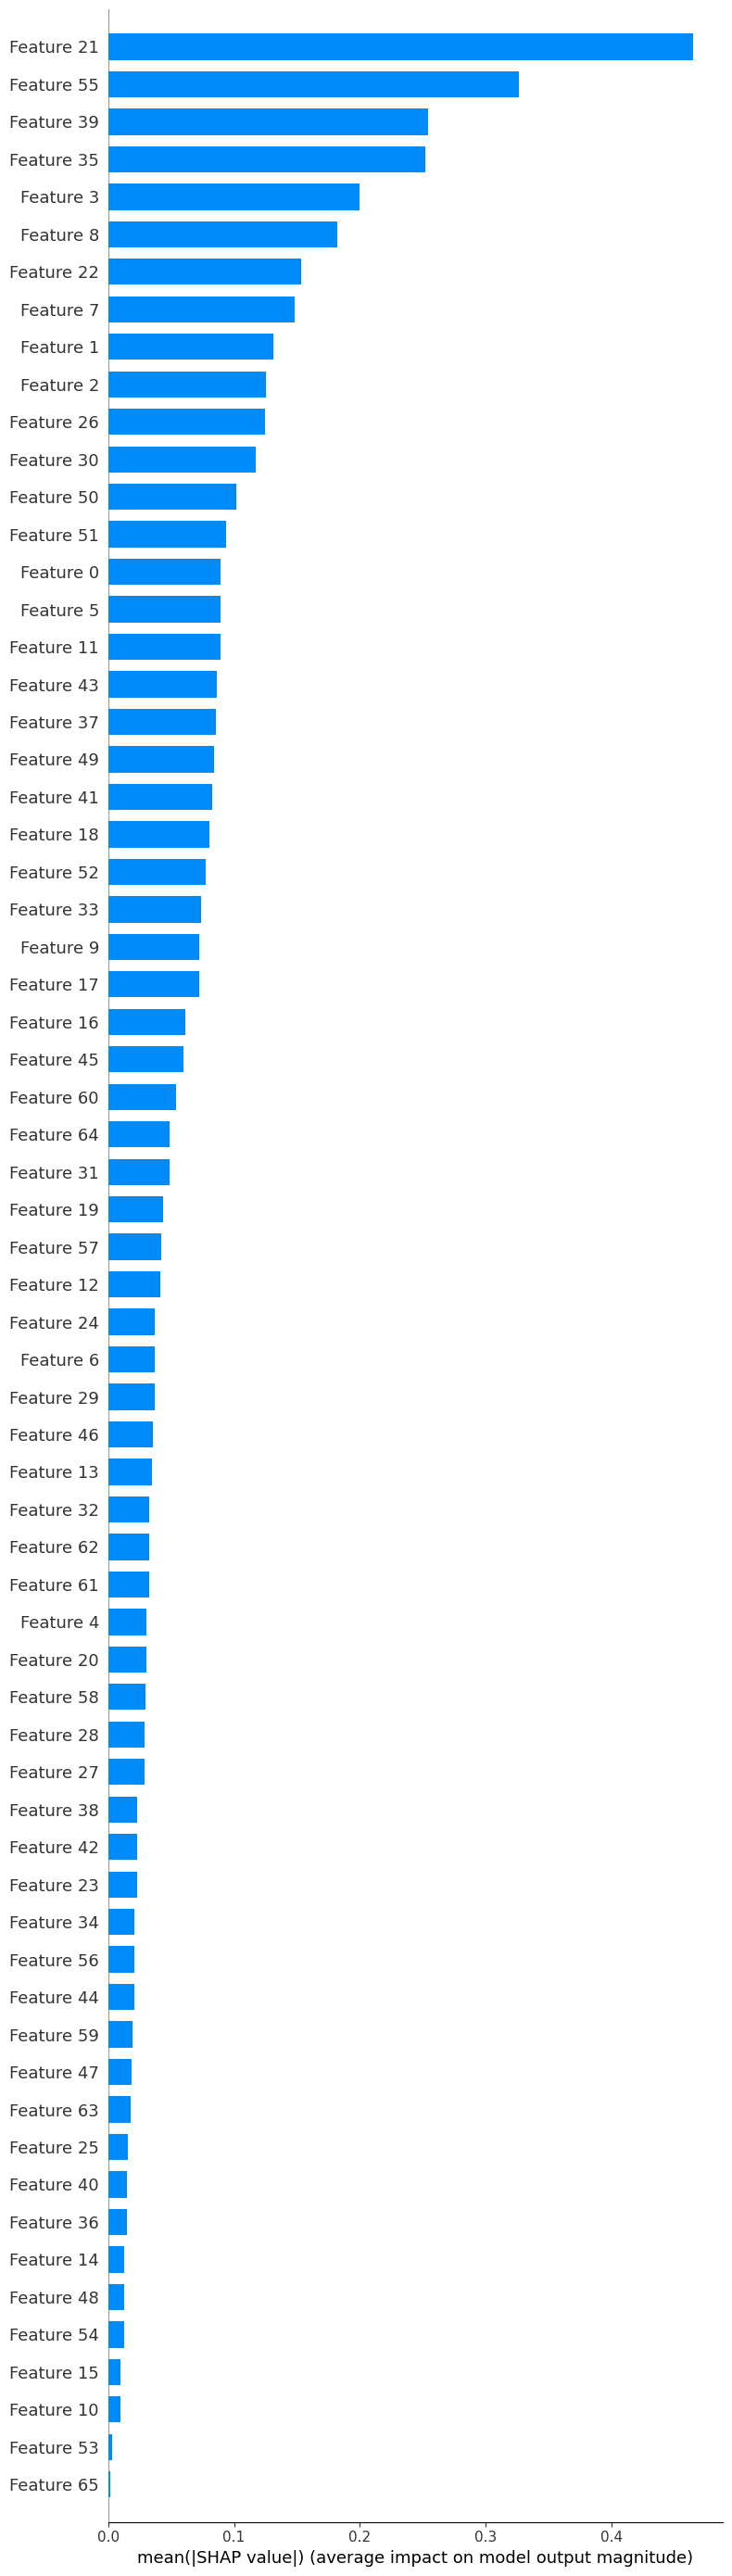

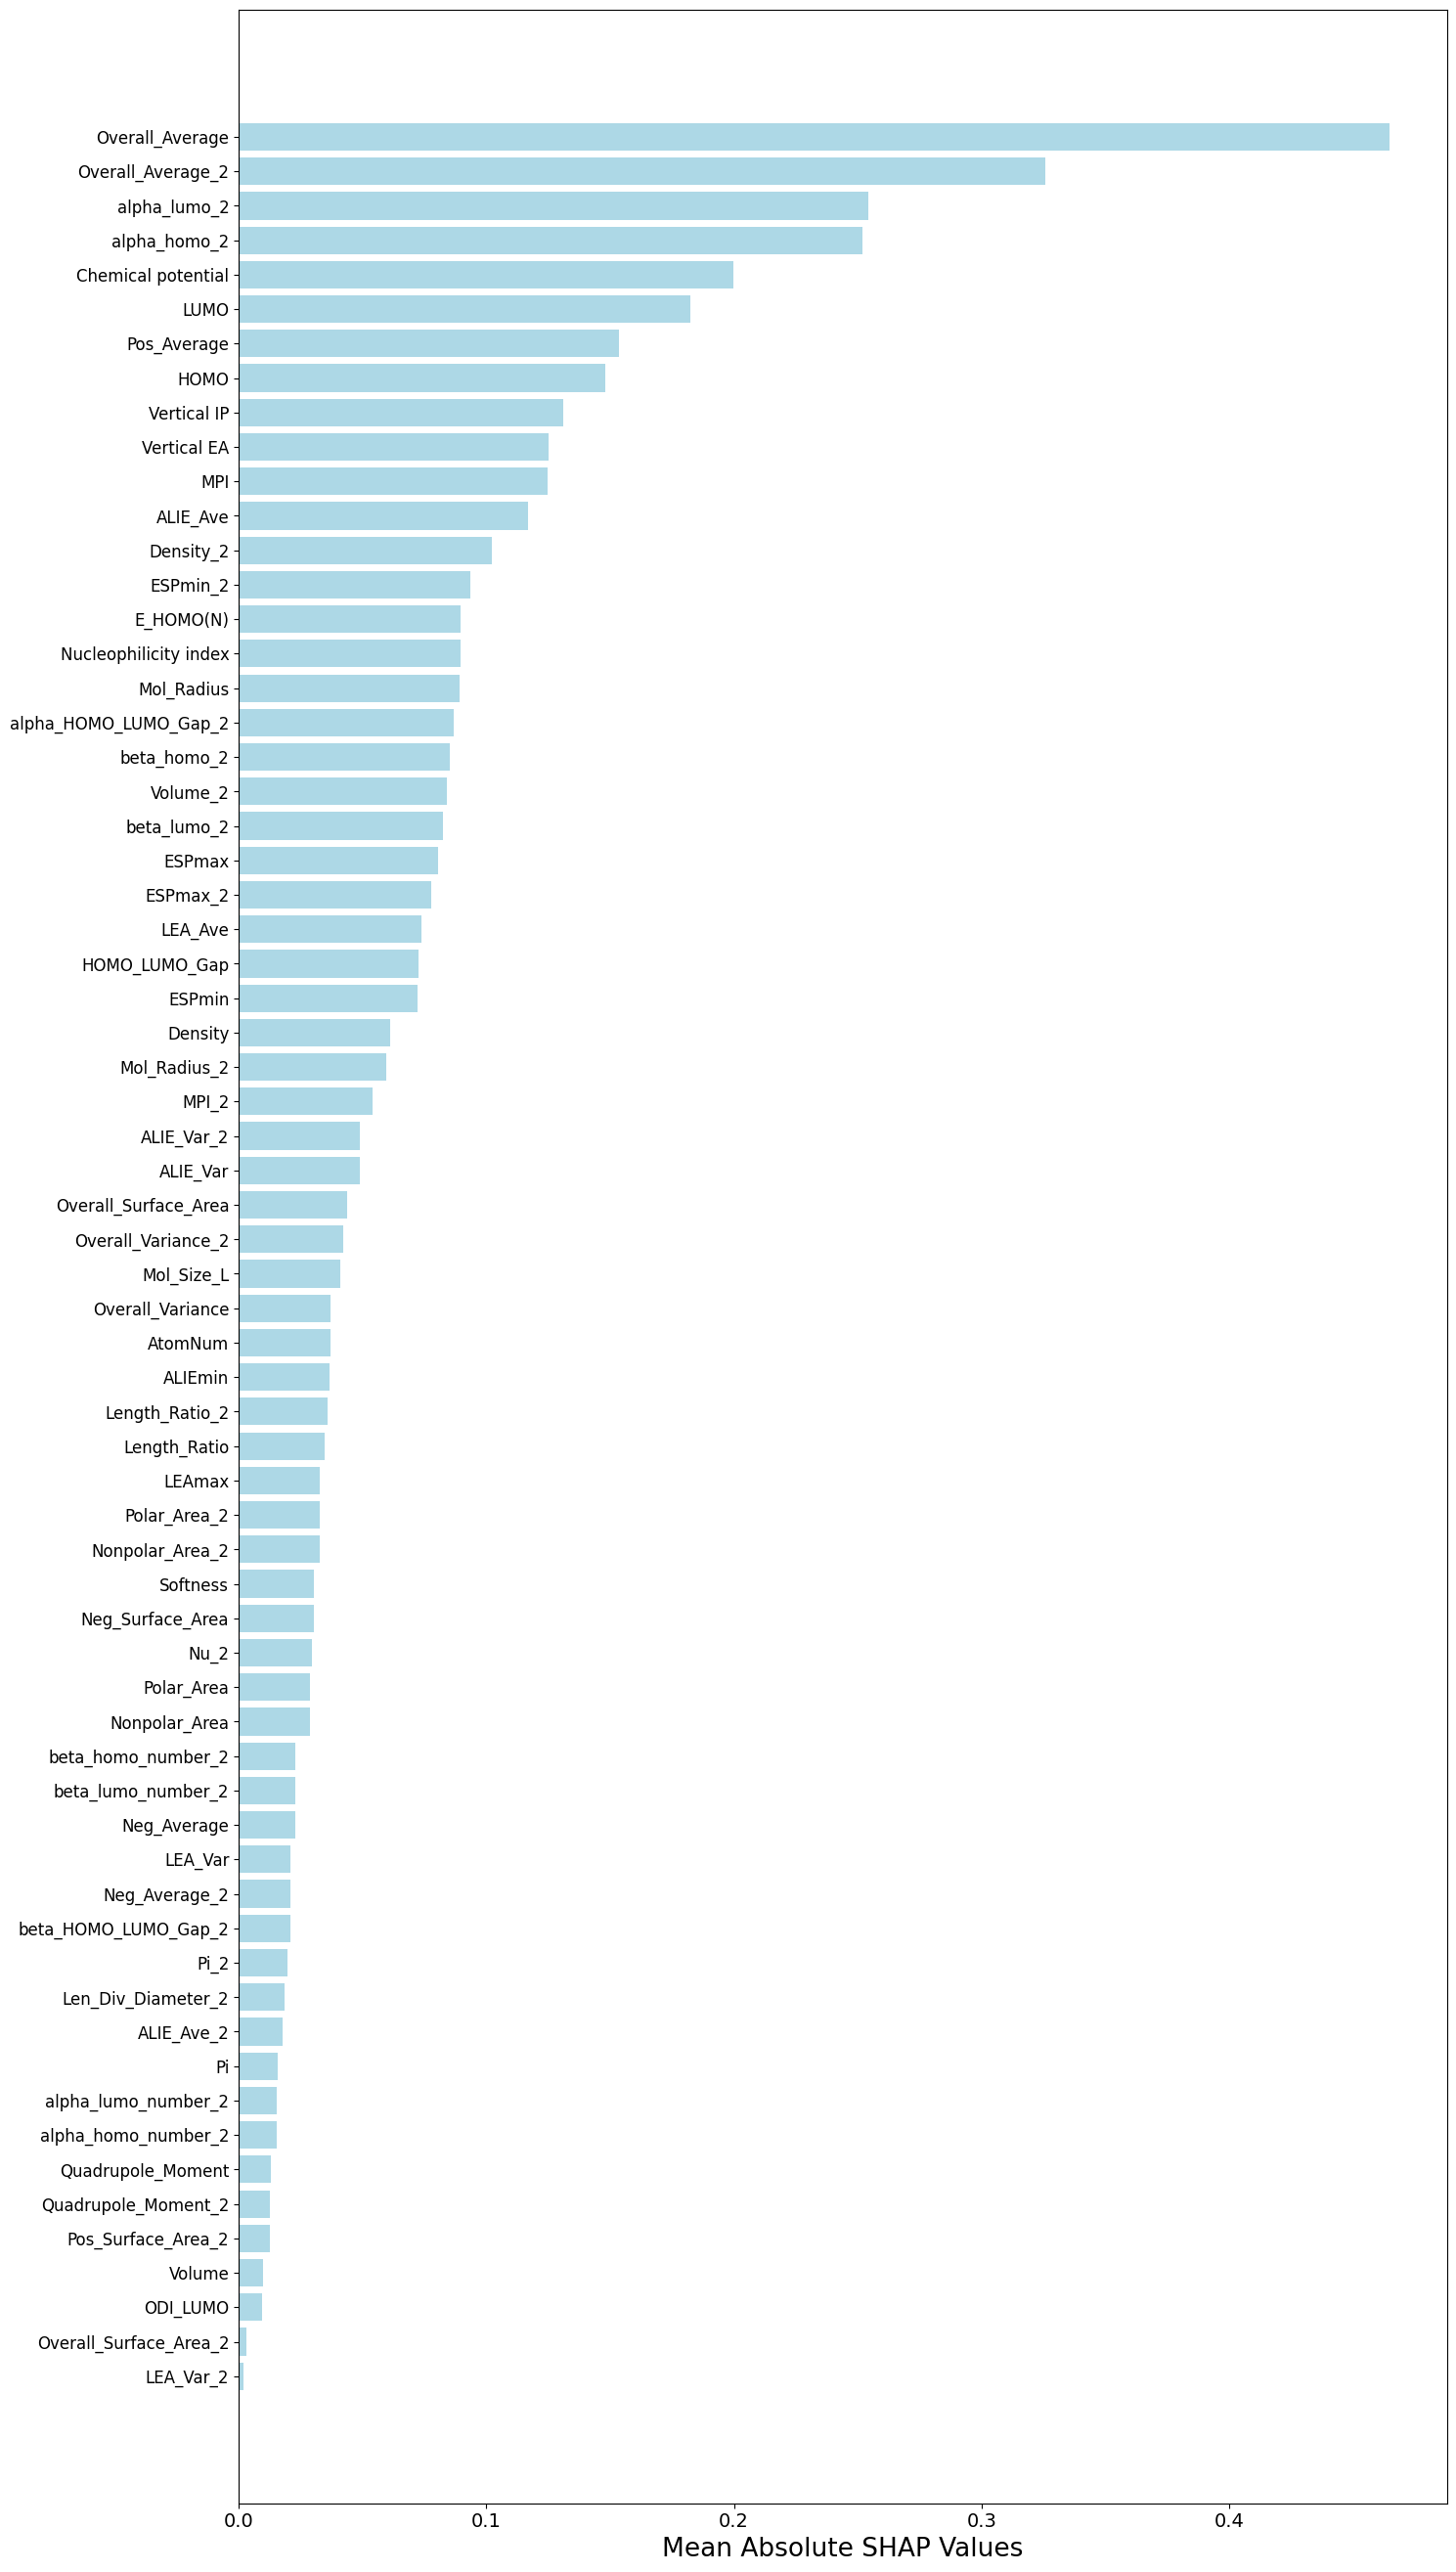

In [23]:
import shap

shap.summary_plot(
    shap_values, 
    X_selected_full, 
    plot_type="bar", 
    max_display=X_selected_full.shape[1]  
)

mean_shap_values = np.abs(shap_values).mean(axis=0)
importance_desc_names = np.array(PhO_rdkit_maccs_columns)[sel_index + 1][np.argsort(mean_shap_values)]
importance_of_sel_desc = mean_shap_values[np.argsort(mean_shap_values)]

fig = plt.figure(figsize=(15, X_selected_full.shape[1] * 0.4))
plt.barh(importance_desc_names, importance_of_sel_desc, color='lightblue', align='center')
plt.xlabel('Mean Absolute SHAP Values', fontsize=19)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
shap.summary_plot(shap_values, X_selected_full, feature_names=np.array(PhO_rdkit_maccs_columns)[sel_index+1])

plt.suptitle("Normalized Feature Importance based on SHAP", fontsize=20)

plt.tight_layout()

plt.savefig('./result/shap_summary_plot.png', dpi=600)
plt.show()


In [64]:
shap.summary_plot(shap_values, X_selected_full, feature_names=np.array(PhO_rdkit_maccs_columns)[sel_index+1], max_display=4)

plt.gca().tick_params(axis='y', labelsize=16) 
plt.tight_layout()
plt.savefig('./result/shap_summary_plot-little.png', dpi=600)
plt.show()


In [29]:
feat_names = np.array(selected_feature_names)[: X_selected_full.shape[1]]

max_index = np.argmax(y_pred_full)

shap_values_max_sample = shap_values[max_index]
X_max_sample = X_selected_full[max_index]

X_max_sample = np.round(X_max_sample, 3)
shap_values_max_sample = np.round(shap_values_max_sample, 3)

force_plot = shap.force_plot(
    explainer.expected_value, 
    shap_values_max_sample, 
    X_max_sample, 
    feature_names=feat_names, 
    matplotlib=True
)

plt.savefig('./result/shapcolorplot-max-Y-improved.jpeg', dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


In [30]:
feat_names = np.array(selected_feature_names)[: X_selected_full.shape[1]]

min_index = np.argmin(y_pred_full)

shap_values_min_sample = shap_values[min_index]
X_min_sample = X_selected_full[min_index]

X_min_sample = np.round(X_min_sample, 3)
shap_values_min_sample = np.round(shap_values_min_sample, 3)

force_plot = shap.force_plot(
    explainer.expected_value, 
    shap_values_min_sample, 
    X_min_sample, 
    feature_names=feat_names, 
    matplotlib=True
)

plt.savefig('./result/shapcolorplot-min-Y-improved.jpeg', dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


In [51]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16


abs_shap = np.abs(shap_values_max_sample)
top5_idx = np.argsort(abs_shap)[-5:] 

order = np.argsort(shap_values_max_sample[top5_idx])
top5_idx = top5_idx[order]

X_max_sample_top5 = X_max_sample[top5_idx]
shap_values_max_sample_top5 = shap_values_max_sample[top5_idx]
feat_names_top5 = feat_names[top5_idx]

full_fx = explainer.expected_value + np.sum(shap_values_max_sample)
S_top5 = np.sum(shap_values_max_sample_top5)

expected_value_new = full_fx - S_top5

force_plot = shap.force_plot(
    expected_value_new,
    shap_values_max_sample_top5,
    X_max_sample_top5,
    feature_names=feat_names_top5,
    matplotlib=True
)

fig = plt.gcf()
for ax in fig.get_axes():
    for text in ax.texts:
        txt = text.get_text()
        x, y = text.get_position()

        if 'f(x)' in txt:
            text.set_position((x, y + 0.1))
        elif "Polar_Area" in txt:
            text.set_position((x + 0.04, y))
        elif "alpha_lumo_number_2" in txt:
            text.set_position((x + 0.02, y))
        elif "Vertical IP" in txt:
            text.set_position((x - 0.03, y))
        
        text.set_fontsize(18)

plt.savefig('./result/shapcolorplot-max-Y-improved_top5.jpeg', dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


# Save model and out-of-bank test set testing

In [67]:
pipeline = joblib.load('Gred.joblib')
X_external = X.iloc[External_index]
y = physorg_react_data_df['YRed/Ox']
y_external = y.iloc[External_index]

ext_pred = pipeline.predict(X_external.to_numpy())
compound_names = physorg_react_data_df['compound_name']
compound_names_external = compound_names.iloc[External_index]


In [69]:
results = pd.DataFrame({
    'Compound Name': compound_names_external.values,
    'Predicted Value': ext_pred,
    'Eexp': y_external.values
})

print(results)

                         Compound Name  Predicted Value  Eexp
0                 Ir-q-bt-Me2-acac-red        -1.852634 -1.87
1                  Ir(dfppz)2Phtz+-red        -1.444505 -1.53
2                    Irppo-acacSPh-red        -1.902019 -1.97
3                 Ir3CFbt-HbpdcNMe-red        -1.532691 -1.46
4                          IrmpbiL-red        -2.064281  -2.1
5               mer-Ir(dfppz)2(pf)-red        -2.527338  -2.6
6                          IrcpbiL-red        -1.906546 -2.04
7              mer-Ir(dfppz)2(ptp)-red        -2.101828 -2.36
8                          IrthbiL-red        -2.046417 -2.04
9                 Ir-q-bt-Me2-bpy+-red        -1.590873 -1.53
10               Ir-q-bt-Ph2-phen+-red        -1.581276 -1.58
11                Irdfppy-CO2Mepic-red        -1.992979  -2.1
12                Irdfppy-COCF3pic-red        -1.847944 -1.91
13                   Irdfppy-CNpic-red        -1.863249 -1.96
14              Ir-tPhTAZ2-phpybi+-red        -1.630398 -1.64
15      

In [55]:
ext_r2 = r2_score(y_external,ext_pred)
ext_mae = mean_absolute_error(y_external,ext_pred)
ext_pearson_r = pearsonr(y_external,ext_pred)[0]

plt.figure(figsize=(4.5,4.5))

plt.scatter(y_external,ext_pred,c='#efae42')

plt.text(-3.4,-0.3,'$R^2$: %.3f'%ext_r2,fontsize=14)
plt.text(-3.4,-0.6,'Pearson R: %.3f'%ext_pearson_r,fontsize=14)
plt.text(-3.4,-0.9,'MAE: %.3f V'%ext_mae,fontsize=14)

plt.plot([y.min(),0],[y.min(),0],c='#efae42')
plt.xlabel('E $_{Exp}$ (V)',fontsize=14)
plt.ylabel('E $_{ML}$ (V)',fontsize=14)
plt.xticks([-3, -2, -1, 0],list(map(str,[-3, -2, -1, 0])),fontsize=13)
plt.yticks([-3, -2, -1, 0],list(map(str,[-3, -2, -1, 0])),fontsize=13)
plt.tick_params(bottom='on',left='on')

plt.tight_layout()
plt.savefig('./result/external-GBRPhO.tif', dpi=600) 
plt.savefig('./result/external-GBRPhO.png', dpi=600)

# Regression curve plotting and error calculation

In [70]:
import numpy as np

re_train = np.abs(val_P - val_Y) / np.abs(val_Y)
re_test = np.abs(test_p - test_y) / np.abs(test_y)
re_ext = np.abs(ext_pred - y_external) / np.abs(y_external)

accuracy_train = np.mean(re_train <= 0.3) * 100
accuracy_test = np.mean(re_test <= 0.3) * 100
accuracy_ext = np.mean(re_ext <= 0.3) * 100
accuracy_train1 = np.mean(re_train <= 0.2) * 100
accuracy_test1 = np.mean(re_test <= 0.2) * 100
accuracy_ext1 = np.mean(re_ext <= 0.2) * 100
accuracy_train2 = np.mean(re_train <= 0.1) * 100
accuracy_test2 = np.mean(re_test <= 0.1) * 100
accuracy_ext2 = np.mean(re_ext <= 0.1) * 100

print(f"Training Accuracy (RE±0.3): {accuracy_train:.2f}%")
print(f"Test Accuracy (RE±0.3): {accuracy_test:.2f}%")
print(f"External Test Accuracy (RE±0.3): {accuracy_ext:.2f}%")
print(f"Training Accuracy (RE±0.2): {accuracy_train1:.2f}%")
print(f"Test Accuracy (RE±0.2): {accuracy_test1:.2f}%")
print(f"External Test Accuracy (RE±0.2): {accuracy_ext1:.2f}%")
print(f"Training Accuracy (RE±0.1): {accuracy_train2:.2f}%")
print(f"Test Accuracy (RE±0.1): {accuracy_test2:.2f}%")
print(f"External Test Accuracy (RE±0.1): {accuracy_ext2:.2f}%")

Training Accuracy (RE±0.3): 99.73%
Test Accuracy (RE±0.3): 100.00%
External Test Accuracy (RE±0.3): 100.00%
Training Accuracy (RE±0.2): 99.18%
Test Accuracy (RE±0.2): 100.00%
External Test Accuracy (RE±0.2): 100.00%
Training Accuracy (RE±0.1): 96.99%
Test Accuracy (RE±0.1): 93.20%
External Test Accuracy (RE±0.1): 94.12%


In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr

train_r2 = r2_score(val_Y, val_P)
train_pearson_r, _ = pearsonr(val_Y, val_P)
train_mae = mean_absolute_error(val_Y, val_P)

test_r2 = r2_score(test_y, test_p)
test_pearson_r, _ = pearsonr(test_y, test_p)
test_mae = mean_absolute_error(test_y, test_p)

ext_r2 = r2_score(y_external, ext_pred)
ext_mae = mean_absolute_error(y_external, ext_pred)
ext_pearson_r = pearsonr(y_external, ext_pred)[0]

re_train = np.abs(val_P - val_Y) / np.abs(val_Y)
re_test = np.abs(test_p - test_y) / np.abs(test_y)
re_ext = np.abs(ext_pred - y_external) / np.abs(y_external)

accuracy_train = np.mean(re_train <= 0.3) * 100
accuracy_test = np.mean(re_test <= 0.3) * 100
accuracy_ext = np.mean(re_ext <= 0.3) * 100
accuracy_train1 = np.mean(re_train <= 0.2) * 100
accuracy_test1 = np.mean(re_test <= 0.2) * 100
accuracy_ext1 = np.mean(re_ext <= 0.2) * 100

print(f"Training Accuracy (RE±0.3): {accuracy_train:.2f}%")
print(f"Test Accuracy (RE±0.3): {accuracy_test:.2f}%")
print(f"External Test Accuracy (RE±0.3): {accuracy_ext:.2f}%")
print(f"Training Accuracy (RE±0.2): {accuracy_train1:.2f}%")
print(f"Test Accuracy (RE±0.2): {accuracy_test1:.2f}%")
print(f"External Test Accuracy (RE±0.2): {accuracy_ext1:.2f}%")

plt.figure(figsize=(6, 6))

plt.scatter(val_Y, val_P, c='#1F2124', label='Training Set', alpha=0.6)

plt.scatter(test_y, test_p, c='#89AA7B', label='Test Set', alpha=0.6)
plt.text(-2.0,-3.3, '$R^2$: %.3f' % test_r2, fontsize=18)
plt.text(-2.0,-3.55, 'Pearson R: %.3f' % test_pearson_r, fontsize=18)
plt.text(-2.0,-3.80, 'MAE: %.3f V' % test_mae, fontsize=18)
plt.text(-2.0,-4.05, f'RE±0.3: {accuracy_test:.2f}%', fontsize=18)
plt.text(-2.0,-4.3, f'RE±0.2: {accuracy_test1:.2f}%', fontsize=18)

plt.scatter(y_external, ext_pred, c='#efae42', label='External Test Set', alpha=0.6)

plt.plot([-4, 0], [-4, 0], c='black', linestyle='--', label='Ideal Fit')

plt.plot([-4, 0], [-4 + 0.3, 0 + 0.3], c='orange', linestyle='--', label='Error bounds of ±0.3 V')
plt.plot([-4, 0], [-4 - 0.3, 0 - 0.3], c='orange', linestyle='--')

plt.xlabel('E $_{Exp}$ (V)', fontsize=22)
plt.ylabel('E $_{ML}$ (V)', fontsize=22)
plt.legend(fontsize=13)

plt.xticks([-4,-3,-2,-1, 0], list(map(str, [-4,-3,-2,-1, 0])), fontsize=18)
plt.yticks([-4,-3,-2,-1, 0], list(map(str, [-4,-3,-2,-1, 0])), fontsize=18)
plt.tight_layout()

plt.savefig('./result/combined_CV_results_with_error_range_optimized.png', dpi=600)
plt.savefig('./result/combined_CV_results_with_error_range_optimized.tif', dpi=600)
plt.show()

Training Accuracy (RE±0.3): 99.73%
Test Accuracy (RE±0.3): 100.00%
External Test Accuracy (RE±0.3): 100.00%
Training Accuracy (RE±0.2): 99.18%
Test Accuracy (RE±0.2): 100.00%
External Test Accuracy (RE±0.2): 100.00%
